# 一、数据导入工作

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'C:\Users\Administrator\Downloads\Pandas代码\data\titanic.csv',engine='python')

In [3]:
data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


# 二、数据透视表

In [49]:
pd.pivot_table(data=data,index='Sex',columns='Pclass',aggfunc='mean',values='Age')

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


In [58]:
new=pd.crosstab(index=data['Sex'],columns=data['Pclass'])

# 三、分组分析

In [99]:
pd.groupby(data,by=data['Sex'])['Age'].agg({'平均数':'mean','计数':'count'})

,平均数,计数
Sex,,
female,27.915709,261
male,30.726645,453


# 四、结构分析

In [66]:
new.div(new.sum(axis=0),axis=1).round(2).applymap('{:,.2f}%' .format)

Pclass,1,2,3
Sex,,,
female,0.44%,0.41%,0.29%
male,0.56%,0.59%,0.71%


# 五、连续变量离散化

In [85]:
bins=[data.Age.min()-1,20,40,60,data.Age.max()+1]
lables=['最小','次最小','中等','最大']
pd.cut(data.Age,bins=bins,labels=lables).head(1)

0    次最小
Name: Age, dtype: category
Categories (4, object): [最小 < 次最小 < 中等 < 最大]

# 六、哑变量操作

In [100]:
pd.get_dummies(data,columns=['Sex','Embarked'],prefix=['Sex','Embarked'],prefix_sep='_',drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1


# 七、数据分层抽样

In [113]:
data.Pclass.value_counts().div(data.Pclass.value_counts().sum(),axis=0).apply('{:,.2f}%'.format)

3    0.55%
1    0.24%
2    0.21%
Name: Pclass, dtype: object

In [117]:
Sample_Dict={3:0.55,2:0.21,1:0.24}

In [120]:
def typicalSampling(group, typicalFracDict):
    name = group.name
    frac = typicalFracDict[name]
    return group.sample(frac=frac)

In [121]:
result = data.groupby('Pclass', group_keys=False).apply(typicalSampling,Sample_Dict)

In [122]:
result 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,PC 17582,153.4625,C125,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
462,463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
701,702,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S
537,538,1,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.4250,NaN,C


# 八、制图操作

In [124]:
plt.rcParams['font.sans-serif']=['SimHei']
#用来正常显示中文标签

plt.rcParams['axes.unicode_minus']=False
#用来正常显示负号

In [125]:
test=pd.read_csv(r'C:\Users\Administrator\Downloads\Pandas代码\data\flowdata.csv',engine='python')

In [128]:
test.head()

,Time,L06_347,LS06_347,LS06_348
0,2009-01-01 00:00:00,0.137417,0.097500,0.016833
1,2009-01-01 03:00:00,0.131250,0.088833,0.016417
2,2009-01-01 06:00:00,0.113500,0.091250,0.016750
3,2009-01-01 09:00:00,0.135750,0.091500,0.016250
4,2009-01-01 12:00:00,0.140917,0.096167,0.017000


In [137]:
test['Time']=pd.to_datetime(test['Time'],format='%Y-%m-%d')

## 8.1 折线图

### 8.1.1 简单折线图制作
- test.plot.line:代表折线图
- x传入横坐标数据以及默认的数据标签，以x='Time'为例，则默认的数据标签为Time
- style是控制折线的样式
- colormap是颜色地图，也可以使用color来控制颜色
- title则为标题名字
- legend为图例

<IPython.core.display.Javascript object>


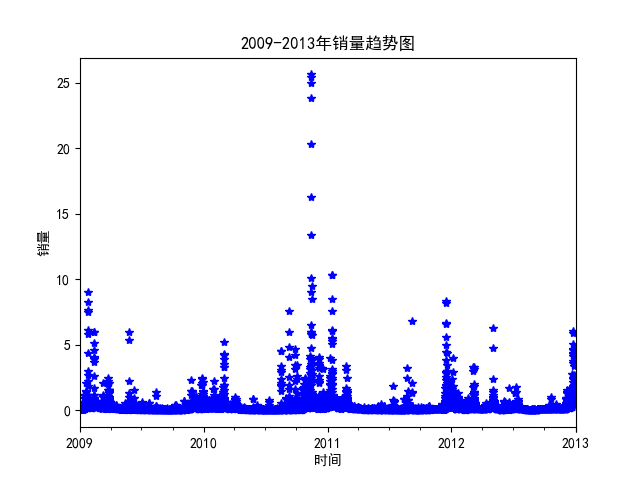

In [336]:
ax=test.plot.line(x='Time',y='L06_347',style='*',colormap='winter',title='2009-2013年销量趋势图',legend=False)
ax.set_xlabel('时间')
ax.set_ylabel('销量')

### 8.1.2 双线折线图制作
- set_xlabel：与ax配合，设置x轴标题
- set_ylabel：与ax配合，设置y轴标题

<IPython.core.display.Javascript object>


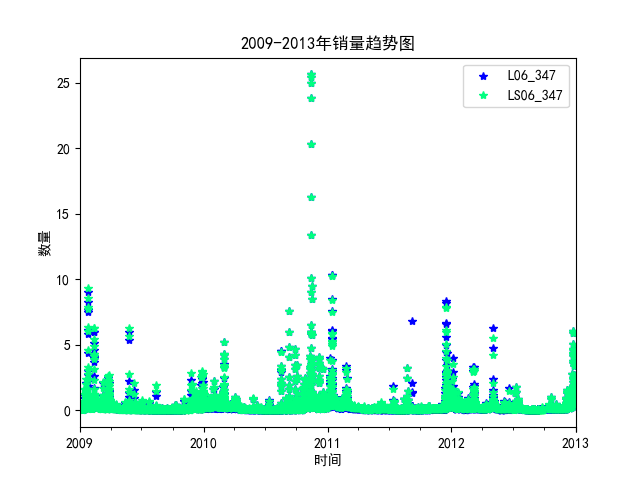

In [338]:
ax1=test.plot.line(x='Time',y=['L06_347','LS06_347'],
          style='*',colormap='winter',
          title='2009-2013年销量趋势图')
ax1.set_xlabel('时间')
ax1.set_ylabel('数量')

### 8.1.3 主次轴折线图制作
- secondary_y：控制传入的副坐标轴数据
- mark_right=False：默认会在legend上副坐标轴数据表示right，用此参数可以去除
- right_ax.set_ylabel：设置副Y坐标轴标题

<IPython.core.display.Javascript object>


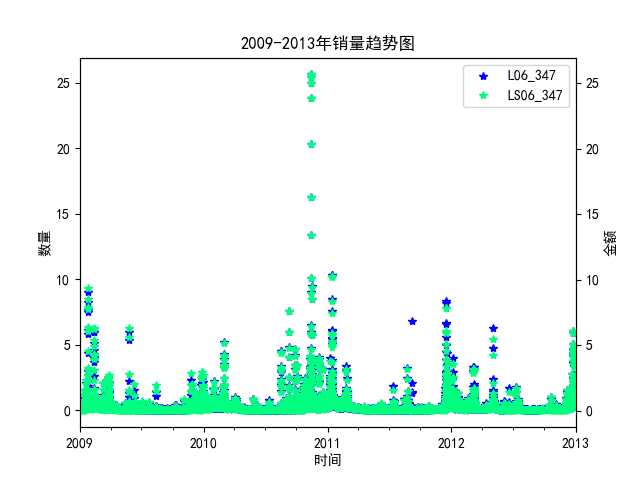

In [175]:
ax2=test.plot.line(x='Time',y=['L06_347','LS06_347'],
          style='*',colormap='winter',secondary_y=['LS06_347'],mark_right=False,
          title='2009-2013年销量趋势图')
ax2.set_xlabel('时间')
ax2.set_ylabel('数量')
ax2.right_ax.set_ylabel('金额')

### 8.1.4 子图折线图制作
- subplots=True:说明图片有子图存在
- layout=(2,-1)，申明子图的结构，此处为行数为2，列数由具体图表来决定，即-1。当然，也可以填入其他数字。
- sharex=False，代表不共享x轴。否则，为共享x轴

<IPython.core.display.Javascript object>


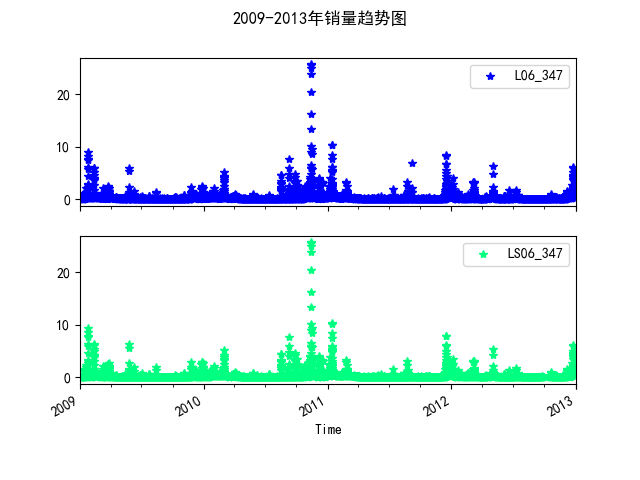

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015C95080>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015B3C748>]], dtype=object)

In [176]:
test.plot.line(x='Time',y=['L06_347','LS06_347'],
          style='*',colormap='winter',title='2009-2013年销量趋势图',
          subplots=True,layout=(2,-1),sharex=True)

## 8.2 柱形图

### 8.2.1 简单柱形图
- bar代表柱形图
- 在Excel中，我们经常数据透视表后，才进行作图操作，调用bar只需传入index以及对应列即可
- 其他设置，其实与折线图类似
- rot=0，代表将x轴标签转成0度

In [233]:
simple=pd.pivot_table(data=data,index='Sex',columns='Embarked',aggfunc='count',values='Age')
simple

Embarked,C,Q,S
Sex,,,
female,61,12,186
male,69,16,368


<IPython.core.display.Javascript object>


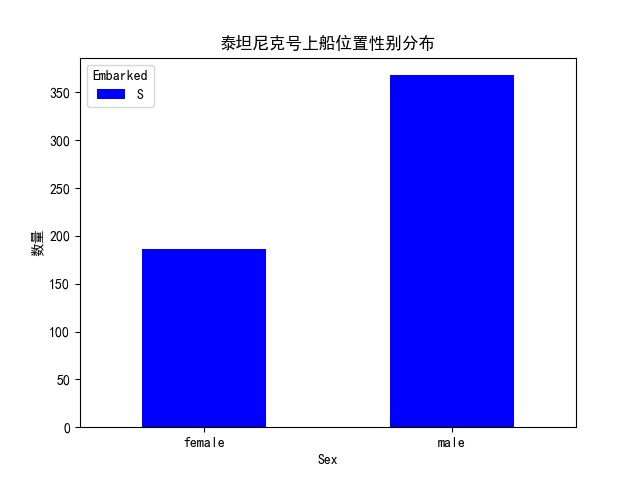

In [234]:
ax3=simple.plot.bar(x=simple.index,y=['S'],title='泰坦尼克号上船位置性别分布',colormap='winter',rot=0)
ax3.set_ylabel('数量')

### 8.2.2 分类柱形图
类比于之前的做法，将分类指标传入y中即可

<IPython.core.display.Javascript object>


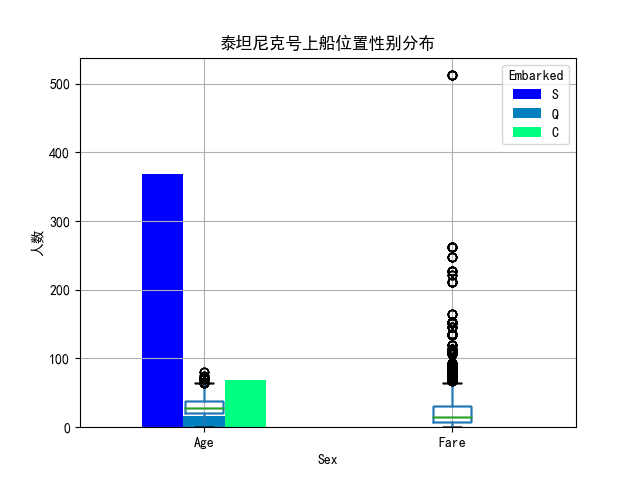

In [365]:
ax4=simple.plot.bar(x=simple.index,y=['S','Q','C'],title='泰坦尼克号上船位置性别分布',colormap='winter',rot=0)
ax4.set_ylabel('人数')

### 8.2.3 分轴柱形图
当legend不能完整显示时，可以适当调整figsize大小，来进行完整显示

<IPython.core.display.Javascript object>


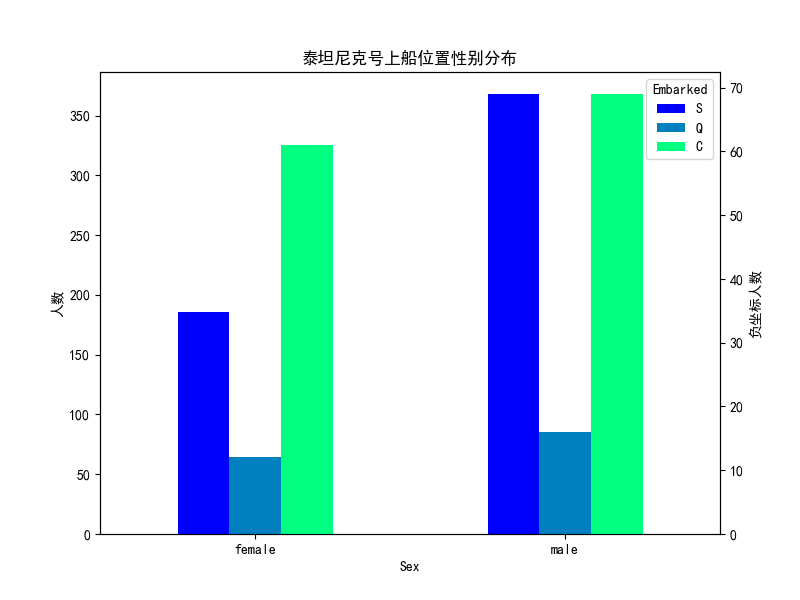

In [270]:
ax5=simple.plot.bar(x=simple.index,y=['S','Q','C'],title='泰坦尼克号上船位置性别分布',colormap='winter',
                    rot=0,secondary_y=['Q','C'],mark_right=False,legend=True,figsize=(8,6))
ax5.set_ylabel('人数')
ax5.right_ax.set_ylabel('负坐标人数')

### 8.2.4 堆积柱形图
- 加入参数stacked=True，就可以将分类柱形图进行堆积

<IPython.core.display.Javascript object>


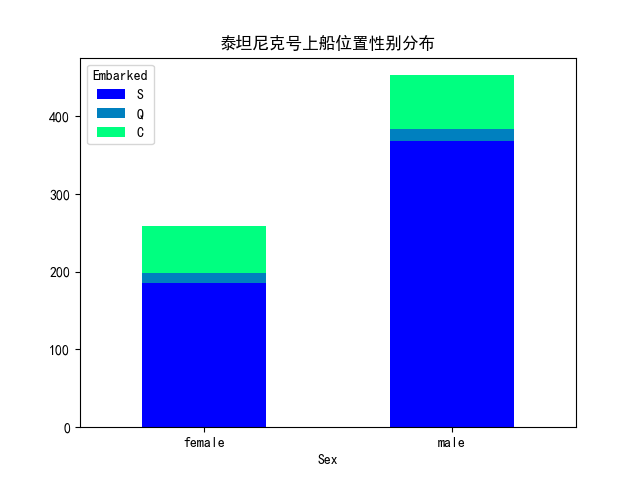

In [275]:
simple.plot.bar(x=simple.index,y=['S','Q','C'],title='泰坦尼克号上船位置性别分布',colormap='winter',rot=0,stacked=True)

### 8.2.5 百分比堆积柱形图
如果想做百分比堆积柱形图，只要将对应的值转换成百分比即可

In [294]:
percent=simple.div(simple.sum(axis=1),axis=0)

In [295]:
percent

Embarked,C,Q,S
Sex,,,
female,0.235521,0.046332,0.718147
male,0.152318,0.035320,0.812362


<IPython.core.display.Javascript object>


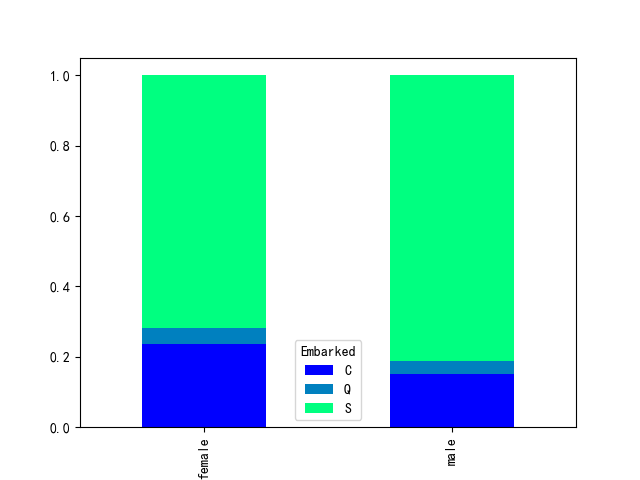

In [296]:
percent.plot.bar(x=only.index,y=['C','Q','S'],colormap='winter',stacked=True)

## 8.3 条形图
只要将bar转换成barh，就可以完美将条形图转换成柱形图。但需要注意的是，设置值所在的轴标签，变成了xlabel

### 8.3.1 简单条形图

<IPython.core.display.Javascript object>


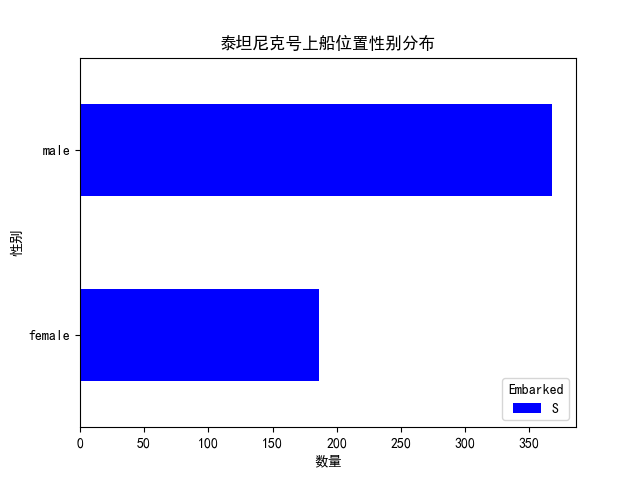

In [363]:
ax6=simple.plot.barh(x=simple.index,y=['S'],title='泰坦尼克号上船位置性别分布',colormap='winter',rot=0)
ax6.set_xlabel('数量')
ax6.set_ylabel('性别')

### 8.3.2 分类条形图

<IPython.core.display.Javascript object>


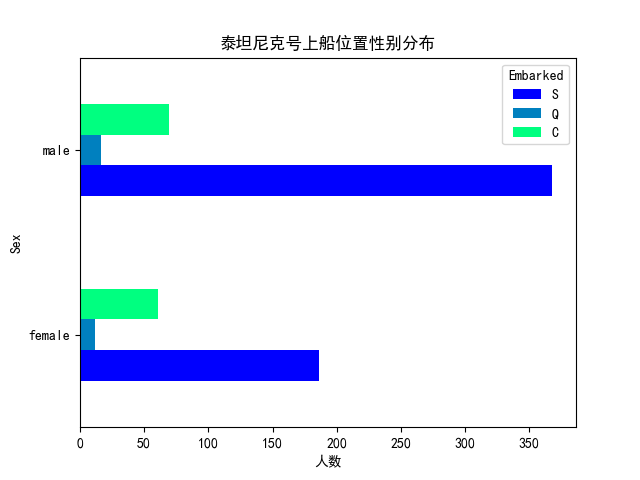

In [284]:
ax7=simple.plot.barh(x=simple.index,y=['S','Q','C'],title='泰坦尼克号上船位置性别分布',colormap='winter',rot=0)
ax7.set_xlabel('人数')

### 8.3.3 堆积条形图

<IPython.core.display.Javascript object>


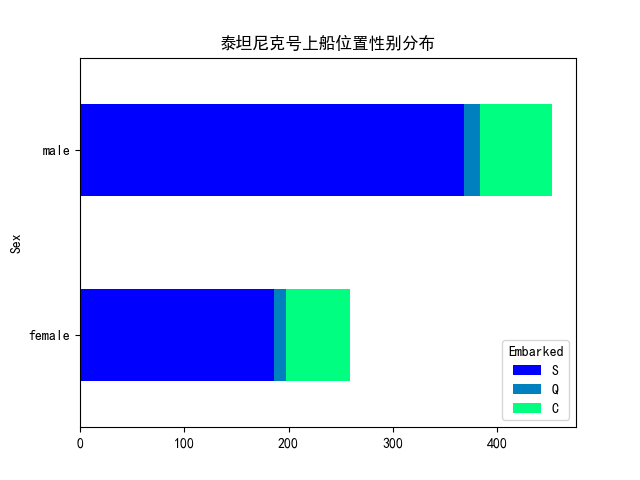

In [289]:
simple.plot.barh(x=simple.index,y=['S','Q','C'],title='泰坦尼克号上船位置性别分布',colormap='winter',rot=0,stacked=True)

### 8.3.4 堆积条形图

<IPython.core.display.Javascript object>


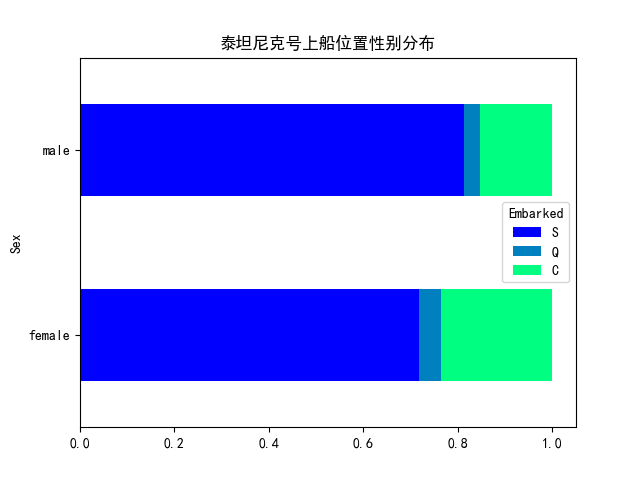

In [390]:
percent.plot.barh(x=percent.index,y=['S','Q','C'],title='泰坦尼克号上船位置性别分布',colormap='winter',rot=0,stacked=True)

## 8.4 散点图
- x：代表x坐标轴及数据
- y：代表y坐标轴及数据
- c：代表颜色，可以传入指定列进行数据标记，当传入c时，可以使用colormap来对数据进行重新规制
- s：代表形状，也可直接传入相关列，或者指定大小

<IPython.core.display.Javascript object>


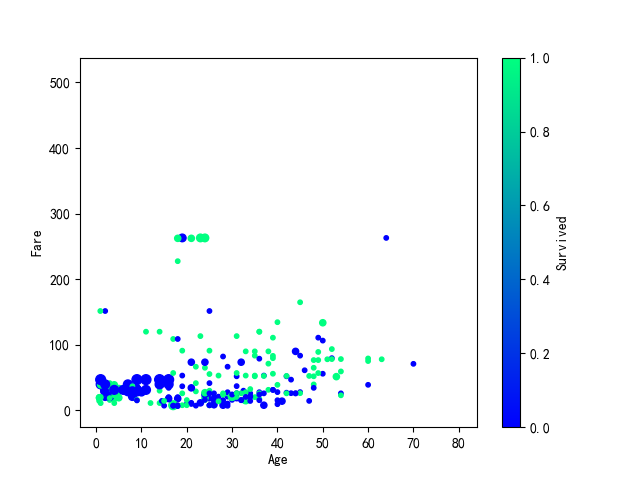

In [344]:
data.plot.scatter(x='Age',y='Fare',c='Survived',colormap='winter',s=data['SibSp']*10)
# s=['SibSp']报错，因此，只能通过前面加上前缀的方法来进行处理

## 8.5 面积图
### 8.5.1 堆积面积图
面积图默认是堆积的，要保证能成这样的面积图，需要所在列要么全是正值，要么全是负值

<IPython.core.display.Javascript object>


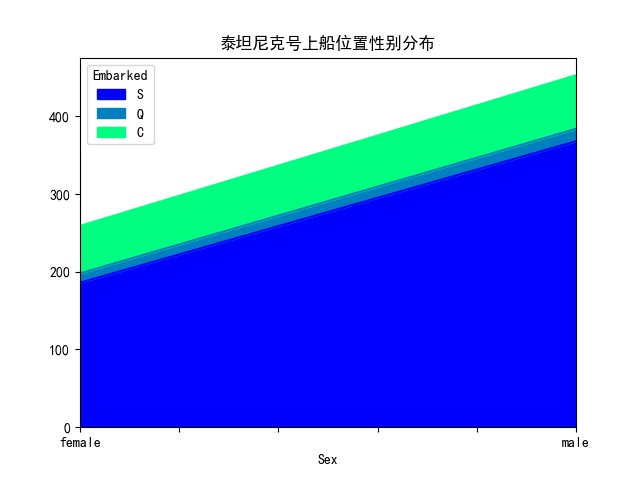

In [366]:
simple.plot.area(x=simple.index,y=['S','Q','C'],title='泰坦尼克号上船位置性别分布',colormap='winter',rot=0)

### 8.5.2 不堆积面积图
默认stacked=True，如果需要不堆积，需要设置stacked=False，且默认透明度是0.5
如果是不堆积的面积图，可以某列数正负数都有

<IPython.core.display.Javascript object>


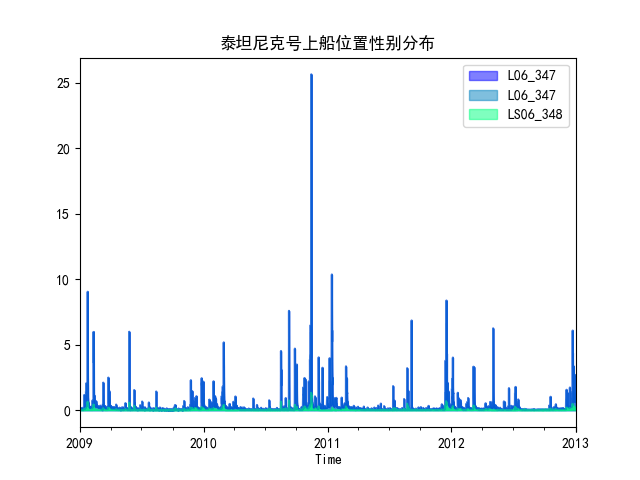

In [373]:
test.plot.area(x='Time',y=['L06_347','L06_347','LS06_348'],title='泰坦尼克号上船位置性别分布',colormap='winter',rot=0,stacked=False)

## 8.6 饼图
- autopct='%1.1f%%'：即输出标签且保留一位小数,目前仅适用于饼图
- 需要axis('equal')来保证饼图是正圆

<IPython.core.display.Javascript object>


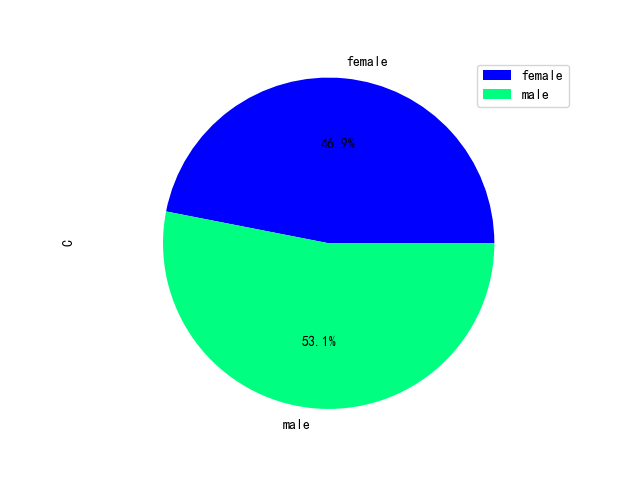

(-1.1085715520166901,
 1.1004081691436518,
 -1.1101960997497837,
 1.1207139782084885)

In [388]:
ax9=simple.plot.pie(y='C',colormap='winter',autopct='%1.1f%%')
ax9.axis('equal')

## 8.7 箱型图

<IPython.core.display.Javascript object>


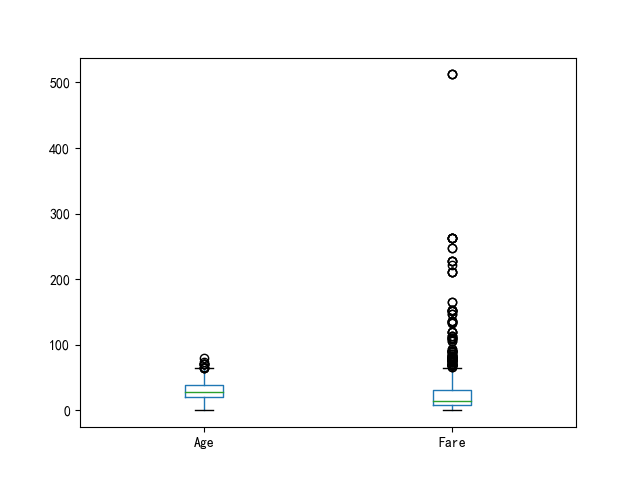

In [402]:
data.plot.box(y=['Age','Fare'])

## 8.8 矩阵图
- from pandas.tools.plotting import scatter_matrix，首先引入矩阵图
- diagonal='hist'，代表对角线是直方图，若是kde，则代表是分布曲线

In [419]:
from pandas.tools.plotting import scatter_matrix

<IPython.core.display.Javascript object>


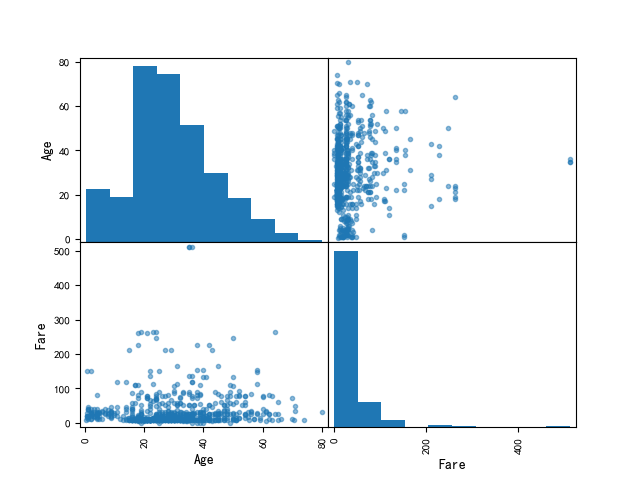

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000572765C0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000057C68EB8>]], dtype=object)

In [426]:
scatter_matrix(data[['Age','Fare']],diagonal='hist')

<IPython.core.display.Javascript object>


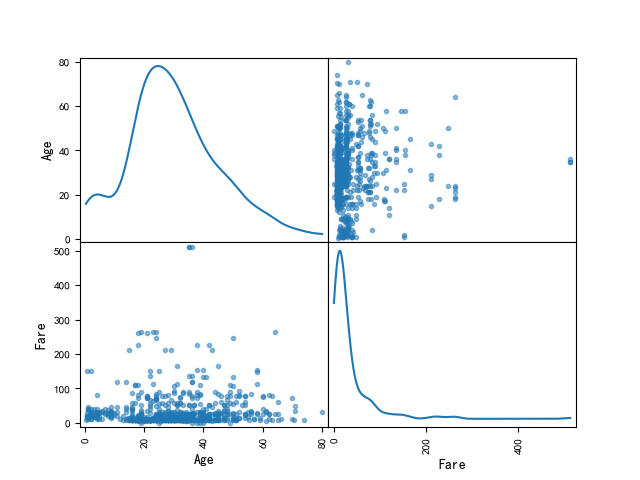

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000571C3128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000058DCBB00>]], dtype=object)

In [427]:
scatter_matrix(data[['Age','Fare']],diagonal='kde')

## 8.9 密度图
直接传入y值即可

<IPython.core.display.Javascript object>


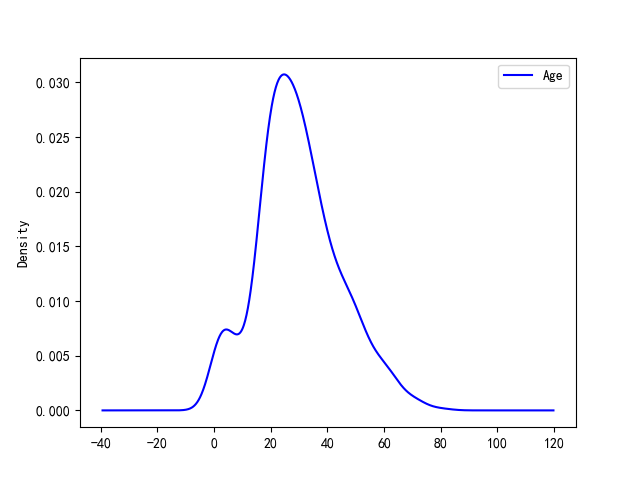

In [429]:
data.plot.kde(y='Age',colormap='winter')